In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 27.4 MB/s 
     |████████████████████████████████| 120 kB 74.3 MB/s 
     |████████████████████████████████| 6.6 MB 47.3 MB/s 


In [2]:
from transformers import AutoModel
from transformers import AutoTokenizer

import torch

import pandas as pd

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [3]:
#device

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AutoModel.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing RobertaModel: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictio

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [5]:
model.to(device)

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [6]:
df = pd.read_csv('/content/drive/MyDrive/NLP_codes/train.csv')
df.head()
# Target = 0 no disaster

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df['target'].unique()

array([1, 0])

In [8]:
df_train = df[['text','target']]
df_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df_train['text'] = df_train['text'].str.lower()
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1
2,all residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,just got sent this photo from ruby #alaska as ...,1


In [10]:
df_train['text'][4]

'just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school '

In [11]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import nltk

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
stops = set(stopwords.words('english'))
#print(stops)
stops.remove('not')


In [15]:
df_train['tweet_without_stopwords'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))
print(df_train)

                                                   text  target  \
0     our deeds are the reason of this #earthquake m...       1   
1                forest fire near la ronge sask. canada       1   
2     all residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     just got sent this photo from ruby #alaska as ...       1   
...                                                 ...     ...   
7608  two giant cranes holding a bridge collapse int...       1   
7609  @aria_ahrary @thetawniest the out of control w...       1   
7610  m1.94 [01:04 utc]?5km s of volcano hawaii. htt...       1   
7611  police investigating after an e-bike collided ...       1   
7612  the latest: more homes razed by northern calif...       1   

                                tweet_without_stopwords  
0         deeds reason #earthquake may allah forgive us  
1                forest fire near la ronge sask. canada  
2     residents asked

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_train


,text,target,tweet_without_stopwords
0,our deeds are the reason of this #earthquake m...,1,deeds reason #earthquake may allah forgive us
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask. canada
2,all residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,just got sent this photo from ruby #alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...
...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...
7609,@aria_ahrary @thetawniest the out of control w...,1,@aria_ahrary @thetawniest control wild fires c...
7610,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,m1.94 [01:04 utc]?5km volcano hawaii. http://t...
7611,police investigating after an e-bike collided ...,1,police investigating e-bike collided car littl...


In [17]:
import string
import re
# Removing twitter handles, punctuation, extra spaces, numbers and special characters
def remove_noise(tweet):
 tweet = re.sub('(@[A-Za-z0–9_]+)','', tweet)
 tweet = ''.join([char if char not in string.punctuation else ' ' for char in tweet])
 tweet = re.sub(' +', ' ', tweet) 
 tweet = re.sub('[0–9]+', '', tweet)
 tweet = re.sub('[^A-Za-z0–9_. ]+','',tweet)
 
 return tweet
df_train['cleaned_tweet'] = df_train['tweet_without_stopwords'].apply(lambda x: remove_noise(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [18]:
df_train

,text,target,tweet_without_stopwords,cleaned_tweet
0,our deeds are the reason of this #earthquake m...,1,deeds reason #earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask. canada,forest fire near la ronge sask canada
2,all residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders c...
4,just got sent this photo from ruby #alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...,two giant cranes holding bridge collapse nearb...
7609,@aria_ahrary @thetawniest the out of control w...,1,@aria_ahrary @thetawniest control wild fires c...,control wild fires california even northern p...
7610,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,m1.94 [01:04 utc]?5km volcano hawaii. http://t...,m utc km volcano hawaii http t co zdtoydebj
7611,police investigating after an e-bike collided ...,1,police investigating e-bike collided car littl...,police investigating e bike collided car littl...


In [19]:
df_train_c = df_train[['cleaned_tweet','target']]

In [20]:
df_train_c.rename(columns = {'cleaned_tweet':'text'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
df_train_c

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders c...,1
4,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...
7608,two giant cranes holding bridge collapse nearb...,1
7609,control wild fires california even northern p...,1
7610,m utc km volcano hawaii http t co zdtoydebj,1
7611,police investigating e bike collided car littl...,1


In [22]:
import sklearn.model_selection

In [23]:
train, test = sklearn.model_selection.train_test_split(df_train_c, test_size=0.2, random_state=42, shuffle=True)

In [24]:
train

,text,target
4996,courageous honest analysis need use atomic bom...,1
3263,thescore wld b shame golf cart became engulfe...,0
4907,tell rescind medals honor given us soldiers ma...,1
2855,worried ca drought might affect you extreme we...,1
4716,lava blast amp power red pantherattack,0
...,...,...
5226,many obliteration servers always like play d,0
5390,panic attack bc enough money drugs alcohol wan...,0
860,omron hem c automatic blood pressure monitor s...,0
7603,officials say quarantine place alabama home po...,1


In [25]:
len(train)

6090

In [26]:
###WE ENCODE IN TOKENIZERS AND TRANSFORM INTO TENSOR

In [27]:
def tokenize(batch):
  return tokenizer(batch["text"], padding = True, truncation = True)

In [28]:
def extract_hidden_states(batch):
  #print(batch.items())
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  # Return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}


In [29]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 26.3 MB/s 
     |████████████████████████████████| 212 kB 74.8 MB/s 
     |████████████████████████████████| 115 kB 60.4 MB/s 
     |████████████████████████████████| 127 kB 75.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [30]:
from datasets import Dataset

In [31]:
train.head()

,text,target
4996,courageous honest analysis need use atomic bom...,1
3263,thescore wld b shame golf cart became engulfe...,0
4907,tell rescind medals honor given us soldiers ma...,1
2855,worried ca drought might affect you extreme we...,1
4716,lava blast amp power red pantherattack,0


In [32]:
train.reset_index(inplace = True, drop = True)

In [33]:
test.reset_index(inplace = True, drop = True)

In [34]:
ds_train = Dataset.from_pandas(train)
ds_test = Dataset.from_pandas(test)

In [35]:
txt_encoded_train = ds_train.map(tokenize, batched = True)
txt_encoded_test = ds_test.map(tokenize, batched = True)
txt_encoded_train

  0%|          | 0/7 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/2 [00:00<?, ?ba/s]

Dataset({
    features: ['text', 'target', 'input_ids', 'attention_mask'],
    num_rows: 6090
})

In [36]:
txt_encoded_train=txt_encoded_train.rename_columns({'target':'labels'})
txt_encoded_test=txt_encoded_test.rename_columns({'target':'labels'})

In [37]:
txt_encoded_train.column_names

['text', 'labels', 'input_ids', 'attention_mask']

In [38]:
txt_encoded_train.set_format("torch",
 columns=["input_ids", "attention_mask", "labels"])

txt_encoded_test.set_format("torch",
 columns=["input_ids", "attention_mask", "labels"])

In [39]:
txt_hidden_train = txt_encoded_train.map(extract_hidden_states, batched=True)
txt_hidden_test = txt_encoded_test.map(extract_hidden_states, batched=True)


  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [40]:
txt_hidden_train

Dataset({
    features: ['text', 'labels', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 6090
})

In [41]:
from sklearn.manifold import TSNE

# The default of 1,000 iterations gives fine results, but I'm training for longer just to eke
# out some marginal improvements. NB: This takes almost an hour!
tsne = TSNE(random_state=1, n_iter=1000, metric="cosine")

embs_train = tsne.fit_transform(txt_hidden_train['hidden_state'])
embs_test = tsne.fit_transform(txt_hidden_test['hidden_state'])
# Add to dataframe for convenience
#df['x'] = embs[:, 0]
#df['y'] = embs[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/us

#After evaluating the last graph we can see that the data can be split, the problem here is that the cluster don´t are accurate with the targets of the dataframe, we will try a supervised method 


In [42]:
import numpy as np
X_train = np.array(txt_hidden_train["hidden_state"])
X_valid = np.array(txt_hidden_test["hidden_state"])
y_train = np.array(txt_hidden_train["labels"])
y_valid = np.array(txt_hidden_test["labels"])
X_train.shape, X_valid.shape

((6090, 768), (1523, 768))

In [43]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

#lr_clf.score(X_train, y_train)

0.7964543663821405

In [44]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

#lr_clf.score(X_train, y_train)


0.7964543663821405

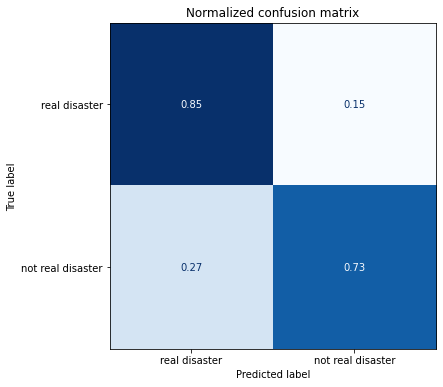

In [45]:
labels = ['real disaster', 'not real disaster']
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)


In [46]:
len(X_valid)

1523